In [29]:
import glob,os
import pandas as pd
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.image as mpimg
%matplotlib inline
from skimage import data


In [17]:
# read files
path = 'traindata/'
files = [f for f in glob.glob(path + "*/*.jpg", recursive=True)]

label_map = {'cherry':0,
             'strawberry':1,
             'tomato':2}
label = [label_map[os.path.basename(file).split('_')[0]] for file in files]

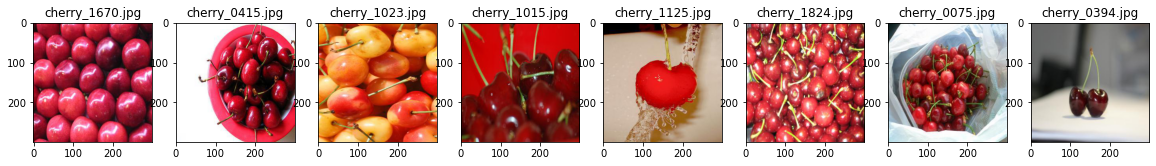

In [4]:
# have a look at the cherry images
np.random.seed(111)
plt.figure(figsize=(20,20))
cherry_folder=r'traindata/cherry'
for i in range(8):
    file = np.random.choice(os.listdir(cherry_folder))
    image_path= os.path.join(cherry_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,8,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

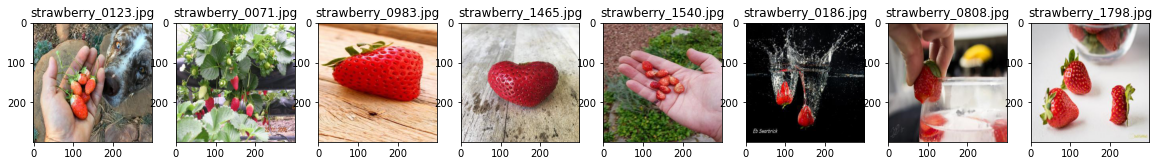

In [5]:
# have a look at the strawberry images
np.random.seed(111)
plt.figure(figsize=(20,20))
cherry_folder=r'traindata/strawberry'
for i in range(8):
    file = np.random.choice(os.listdir(cherry_folder))
    image_path= os.path.join(cherry_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,8,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

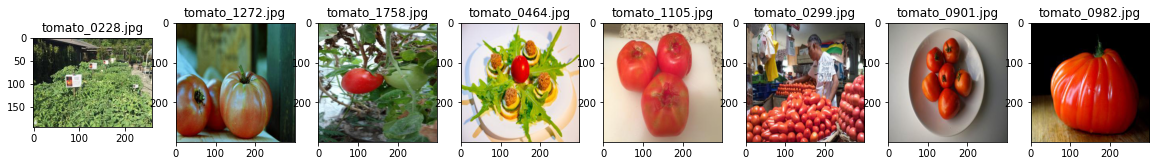

In [6]:
# have a look at the strawberry images
np.random.seed(111)
plt.figure(figsize=(20,20))
cherry_folder=r'traindata/tomato'
for i in range(8):
    file = np.random.choice(os.listdir(cherry_folder))
    image_path= os.path.join(cherry_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,8,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

From the first looking images from these three folders, I found some images are very hard to detect, tomato_0228, for instance. This kind of images could be noisy. 

Some images might have different size, therefore, I should resize the images.

#### split train test dataset

In [30]:
from sklearn.model_selection import train_test_split


In [31]:
import splitfolders  

# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
splitfolders.ratio("data", output="train_test", seed=42, ratio=(.8, .2), group_prefix=None) # default values

Copying files: 4415 files [00:10, 438.52 files/s]


#### read data and preprocessing

In [20]:
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms
import torch

transform = transforms.Compose([
    transforms.Resize(100), 
    transforms.CenterCrop(100),
    transforms.ToTensor(), 
    transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))])
    
train_dataset = ImageFolder('train_test/train', transform=transform)
val_dataset = ImageFolder('train_test/val', transform=transform)

#### build simple baseline model

In [21]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

In [22]:
# Set fixed random number seed
torch.manual_seed(42)
trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=10, shuffle=True, num_workers=1)
valloader = torch.utils.data.DataLoader(val_dataset, batch_size=10, shuffle=True, num_workers=1)

In [25]:
import os
import torch
from torch import nn
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader
from torchvision import transforms

class MLP(nn.Module):
  '''
    Multilayer Perceptron.
  '''
  def __init__(self):
    super().__init__()
    self.layers = nn.Sequential(
      nn.Flatten(),
      nn.Linear(100 * 100 * 3, 64),
      nn.ReLU(),
      nn.Linear(64, 32),
      nn.ReLU(),
      nn.Linear(32, 3)
    )


  def forward(self, x):
    '''Forward pass'''
    return self.layers(x)
  
  
# Initialize the MLP
mlp = MLP()

# Define the loss function and optimizer
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mlp.parameters(), lr=1e-4)
  
  # Run the training loop
for epoch in range(0, 20): # 5 epochs at maximum
    
    # Print epoch
    print(f'Starting epoch {epoch+1}')
    
    # Set current loss value
    current_loss = 0.0
    
    # Iterate over the DataLoader for training data
    for i, data in enumerate(trainloader, 0):
      
      # Get inputs
      inputs, targets = data
      
      # Zero the gradients
      optimizer.zero_grad()
      
      # Perform forward pass
      outputs = mlp(inputs)
      
      # Compute loss
      loss = loss_function(outputs, targets)
      
      # Perform backward pass
      loss.backward()
      
      # Perform optimization
      optimizer.step()
      
      # Print statistics
      current_loss += loss.item()
      if i % 500 == 499:
          print('Loss after mini-batch %5d: %.3f' %
                (i + 1, current_loss / 500))
          current_loss = 0.0

# Process is complete.
print('Training process has finished.')

Starting epoch 1
Starting epoch 2
Starting epoch 3
Starting epoch 4
Starting epoch 5
Starting epoch 6
Starting epoch 7
Starting epoch 8
Starting epoch 9
Starting epoch 10
Starting epoch 11
Starting epoch 12
Starting epoch 13
Starting epoch 14
Starting epoch 15
Starting epoch 16
Starting epoch 17
Starting epoch 18
Starting epoch 19
Starting epoch 20
Training process has finished.


In [26]:
correct = 0 # correct number of images
total = 0 # total number of images

with torch.no_grad():
    for data in valloader:
        images, labels = data
        outputs = mlp(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum()

print('accuracy',correct / total)

accuracy tensor(0.4966)
